Epoch 1/20 | Discriminator Loss: 1.0346 | Generator Loss: 0.7647
Epoch 2/20 | Discriminator Loss: 0.9538 | Generator Loss: 0.7637
Epoch 3/20 | Discriminator Loss: 0.9337 | Generator Loss: 0.7729
Epoch 4/20 | Discriminator Loss: 0.9306 | Generator Loss: 0.7698
Epoch 5/20 | Discriminator Loss: 0.9280 | Generator Loss: 0.7696
Epoch 6/20 | Discriminator Loss: 0.9264 | Generator Loss: 0.7664
Epoch 7/20 | Discriminator Loss: 0.9248 | Generator Loss: 0.7626
Epoch 8/20 | Discriminator Loss: 0.9227 | Generator Loss: 0.7587
Epoch 9/20 | Discriminator Loss: 0.9231 | Generator Loss: 0.7554
Epoch 10/20 | Discriminator Loss: 0.9237 | Generator Loss: 0.7505
Epoch 11/20 | Discriminator Loss: 0.9215 | Generator Loss: 0.7500
Epoch 12/20 | Discriminator Loss: 0.9210 | Generator Loss: 0.7446
Epoch 13/20 | Discriminator Loss: 0.9204 | Generator Loss: 0.7441
Epoch 14/20 | Discriminator Loss: 0.9200 | Generator Loss: 0.7433
Epoch 15/20 | Discriminator Loss: 0.9196 | Generator Loss: 0.7411
Epoch 16/20 | Discr

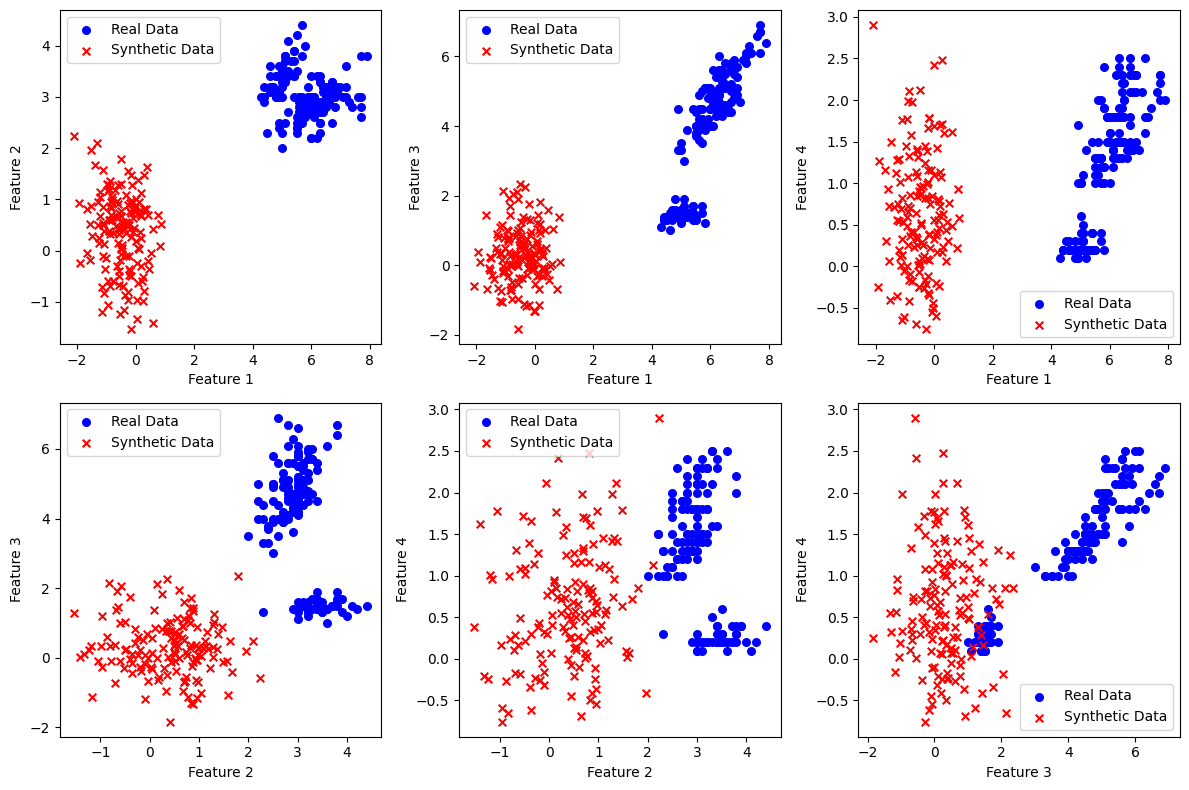

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load and Preprocess the Iris Dataset
iris = load_iris()
x_train = iris.data

# Build the GAN model
def build_generator():
    model = Sequential()
    model.add(Dense(128, input_shape=(100,), activation='relu'))
    model.add(Dense(4, activation='linear'))  # Output 4 features
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, input_shape=(4,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)

# Compile the Models
generator.compile(loss='mean_squared_error', optimizer=Adam(0.0002, 0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training Loop
epochs = 20
batch_size = 16

for epoch in range(epochs):
    # Train discriminator
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_samples = x_train[idx]
    fake_samples = generator.predict(np.random.normal(0, 1, (batch_size, 100)), verbose=0)

    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, real_labels)

    # Print progress
    print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {0.5 * (d_loss_real[0] + d_loss_fake[0]):.4f} | Generator Loss: {g_loss:.4f}")

# Generating Synthetic Data
synthetic_data = generator.predict(np.random.normal(0, 1, (150, 100)), verbose=0)

# Create scatter plots for feature pairs
plt.figure(figsize=(12, 8))
plot_idx = 1
for i in range(4):
    for j in range(i + 1, 4):
        plt.subplot(2, 3, plot_idx)
        plt.scatter(x_train[:, i], x_train[:, j], label='Real Data', c='blue', marker='o', s=30)
        plt.scatter(synthetic_data[:, i], synthetic_data[:, j], label='Synthetic Data', c='red', marker='x', s=30)
        plt.xlabel(f'Feature {i + 1}')
        plt.ylabel(f'Feature {j + 1}')
        plt.legend()
        plot_idx += 1

plt.tight_layout()
plt.show()
